In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
data = pd.read_csv('data/Carseats.csv')
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
features = data[['Price', 'Urban', 'US']].copy()
labels = data['Sales'].copy()

In [4]:
eqn = 'Sales ~ Price + C(Urban) + C(US)'
model = ols(eqn, data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sat, 25 May 2024   Prob (F-statistic):           2.39e-23
Time:                        10:15:37   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          13.0435      0.651     

Neither fit the data very well, but it seems that Urban adds nothing to the model

In [5]:
smaller_model = ols('Sales ~ Price + C(US)', data=data).fit()
print(smaller_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sat, 25 May 2024   Prob (F-statistic):           2.66e-24
Time:                        10:15:37   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0308      0.631     20.652   

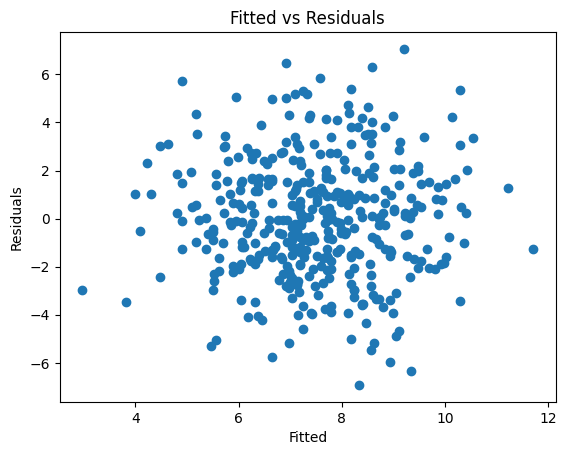

In [6]:
residuals = model.resid
fitted = model.fittedvalues
plt.scatter(fitted, residuals)
plt.xlabel('Fitted')
plt.ylabel('Residuals')
plt.title('Fitted vs Residuals')
plt.show()

No outliers than can be seen here

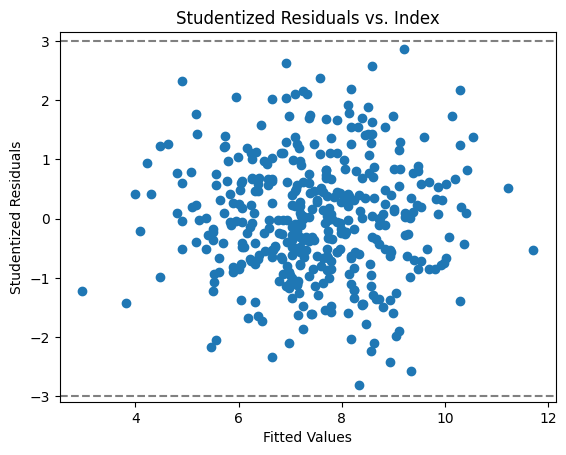

In [7]:
# get studentized residuals
studentized_residuals = model.get_influence().resid_studentized_internal
preds = model.predict(features)
# show outliers where studentized residuals are greater than 3
plt.scatter(preds, studentized_residuals)
plt.axhline(y=3, color='grey', linestyle='--')
plt.axhline(y=-3, color='grey', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Studentized Residuals')
plt.title('Studentized Residuals vs. Index')
plt.show()

Many high-leverage values

In [22]:
def plot_outliers(model):

    vars = model.model.exog_names    # Independent variables
    # show leverage plot
    leverage = model.get_influence().hat_matrix_diag
    studentized_residuals = model.get_influence().resid_studentized_internal
    leverage_point = (2 * len(vars)) / studentized_residuals.shape[0] # 2 * (p + 1) / n, since vars includes the intercept
    # show high leverage points
    plt.scatter(leverage, studentized_residuals)
    plt.axhline(y=3, color='grey', linestyle='--')
    plt.axhline(y=-3, color='grey', linestyle='--')
    plt.axvline(x=leverage_point, color='grey', linestyle='--')
    plt.xlabel('Leverage')
    plt.ylabel('Studentized Residuals')
    plt.title('Studentized Residuals vs. Leverage')
    plt.show()

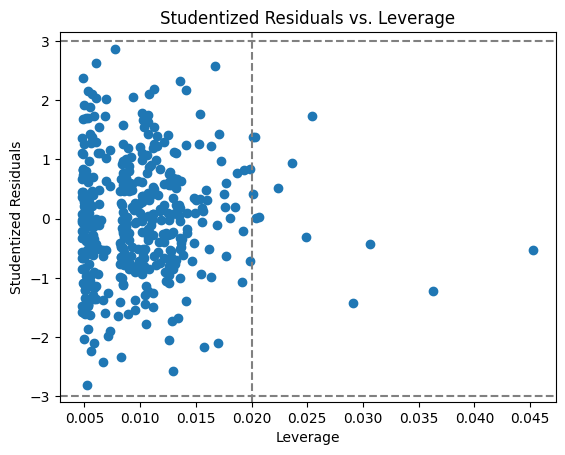

In [23]:
plot_outliers(model)

Smaller model

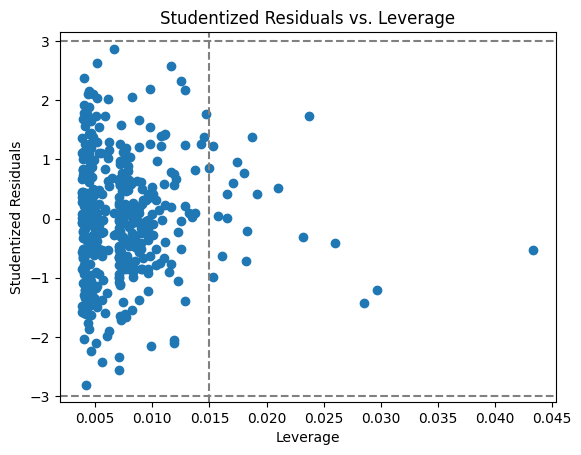

In [24]:
plot_outliers(smaller_model)